In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr, kendalltau

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving SB11_20231.TXT to SB11_20231.TXT


In [ ]:
datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),
                                     delimiter='¬')


<ipython-input-25-0065a2258b78>:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),


In [ ]:
icfes_sin_nan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) & (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) & (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
 (~datos_icfes['PUNT_C_NATURALES'].isna()) & (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) & (~datos_icfes['PUNT_INGLES'].isna())]

Este código asegura que solo trabajemos con datos completos en las columnas clave, eliminando aquellas filas que tienen valores faltantes, lo cual es esencial para garantizar la precisión y fiabilidad del análisis estadístico.

In [ ]:
tabla_regresion = datos_icfes[['ESTU_INSE_INDIVIDUAL', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
tabla_regresion.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,67.532814,100,83,77,77,87.0
1,47.223972,67,58,68,68,NaN
2,67.695519,37,42,35,35,NaN
3,41.863163,45,41,41,27,58.0


 Este índice parece estar relacionado con el nivel socioeconómico del estudiante. Vemos que el rango de los valores es variado, con el más alto siendo aproximadamente 67.7 y el más bajo cerca de 41.86.
 En la primera fila, se observa que el estudiante con el mayor índice socioeconómico (67.53) tiene también las puntuaciones más altas en todas las asignaturas: 100 en Lectura Crítica, 83 en Matemáticas, 77 en Ciencias Naturales y Sociales, y 87 en Inglés.
 Un estudiante con un índice socioeconómico más bajo (41.86 en la fila 3) tiene puntajes más modestos: 45 en Lectura Crítica, 41 en Matemáticas y Ciencias Naturales, 27 en Sociales y Ciudadanas, y 58 en Inglés.
 Notamos que algunos estudiantes (como el de la fila 2) no tienen puntuación en Inglés, lo que podría indicar que no presentaron esa parte del examen.


<Axes: >

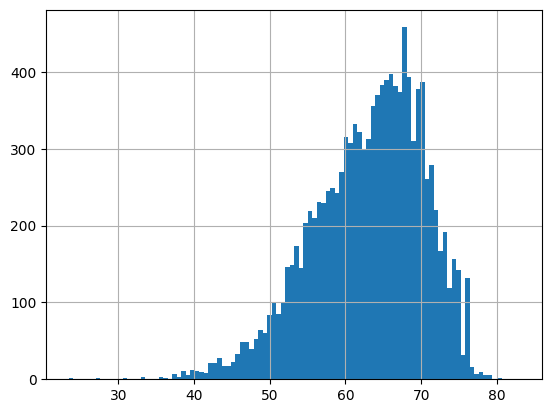

In [ ]:
tabla_regresion["ESTU_INSE_INDIVIDUAL"].hist(bins=100)

En este codigo, se hizo la tabla de regresion lineal para las los datos de los niños y saber su nivel socioeconomico

<Axes: >

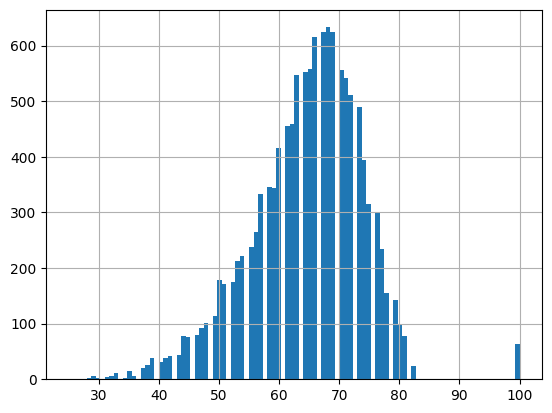

In [ ]:
tabla_regresion["PUNT_LECTURA_CRITICA"].hist(bins=100)

<Axes: >

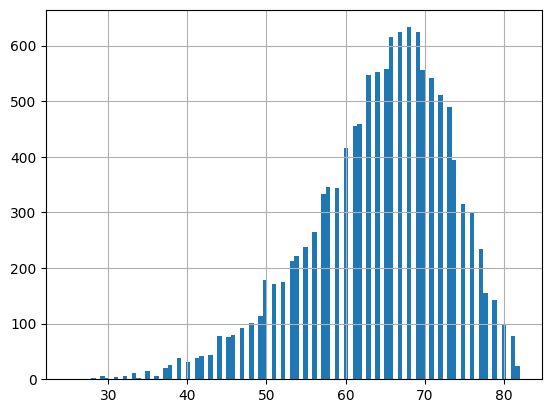

In [ ]:
PUNT_LECTURA_CRITICA1 = tabla_regresion[tabla_regresion["PUNT_LECTURA_CRITICA"] < 99]
PUNT_LECTURA_CRITICA1["PUNT_LECTURA_CRITICA"].hist(bins=100)

Este paso selecciona todas las filas de la tabla de regresión donde el puntaje de Lectura Crítica es menor a 99. Esto significa que cualquier estudiante con un puntaje de Lectura Crítica de 99 o más no será considerado en este análisis.

<Axes: >

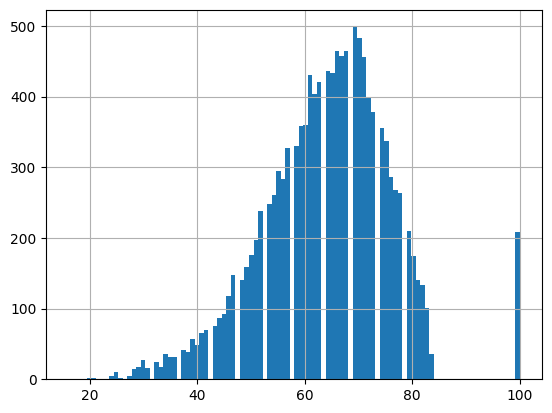

In [ ]:
tabla_regresion["PUNT_MATEMATICAS"].hist(bins=100)

<Axes: >

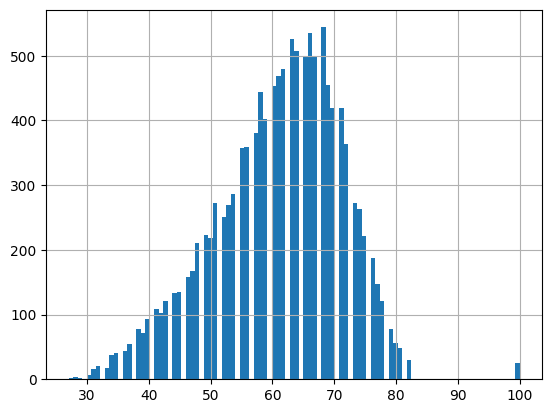

In [ ]:
tabla_regresion["PUNT_C_NATURALES"].hist(bins=100)

<Axes: >

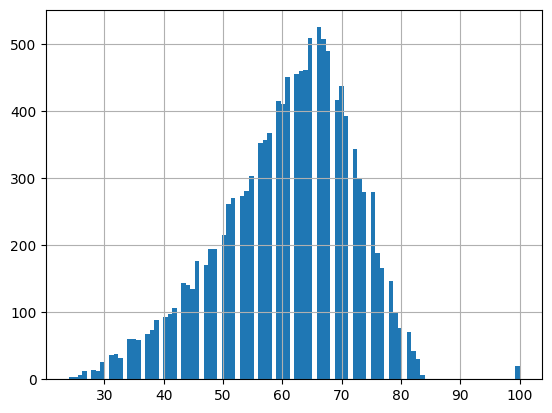

In [ ]:
tabla_regresion["PUNT_SOCIALES_CIUDADANAS"].hist(bins=100)

<Axes: >

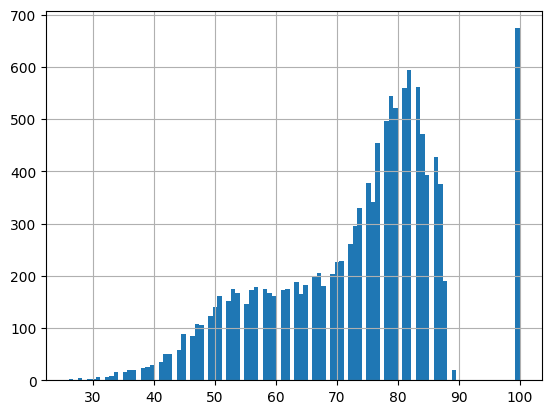

In [ ]:
tabla_regresion["PUNT_INGLES"].hist(bins=100)

In [ ]:
tabla_regresion1 = tabla_regresion[(tabla_regresion["PUNT_LECTURA_CRITICA"] < 99) & (tabla_regresion["PUNT_MATEMATICAS"] < 99) &
                                   (tabla_regresion["PUNT_C_NATURALES"] < 99) & (tabla_regresion["PUNT_SOCIALES_CIUDADANAS"] < 99) &
                                   (tabla_regresion["PUNT_INGLES"] < 99)]
tabla_regresion1.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0
6,39.984838,69,60,59,51,50.0


In [ ]:
x = np.array(tabla_regresion1["ESTU_INSE_INDIVIDUAL"]).reshape(-1,1)
y = tabla_regresion1["PUNT_MATEMATICAS"]
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 0)
modelo_lineal0 = LinearRegression(        )
regresion0 = modelo_lineal0.fit(trainX, trainY)
pred_lineal = regresion0.predict(testx)


ValueError: Input y contains NaN.

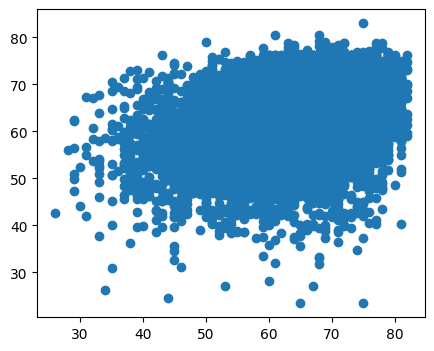

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["PUNT_LECTURA_CRITICA"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
# plt.plot(testx, pred_lineal, linestyle='-', color = "red")
# plt.plot(tabla_regresion1["PUNT_LECTURA_CRITICA"], pred_lineal01, linestyle='-', color = "green")
plt.show()

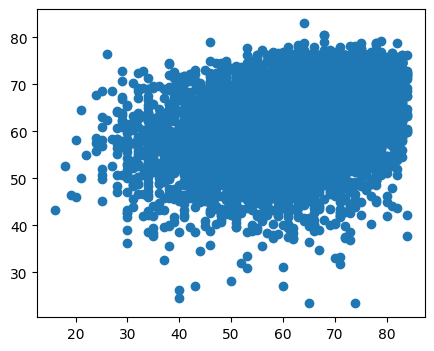

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["PUNT_MATEMATICAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
# plt.plot(testx, pred_lineal, linestyle='-', color = "red")
# plt.plot(tabla_regresion1["ESTU_INSE_INDIVIDUAL"], pred_lineal01, linestyle='-', color = "green")
plt.show()

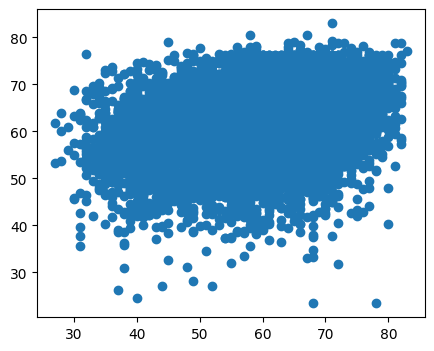

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["PUNT_C_NATURALES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
# plt.plot(testx, pred_lineal, linestyle='-', color = "red")
# plt.plot(tabla_regresion1["ESTU_INSE_INDIVIDUAL"], pred_lineal01, linestyle='-', color = "green")
plt.show()

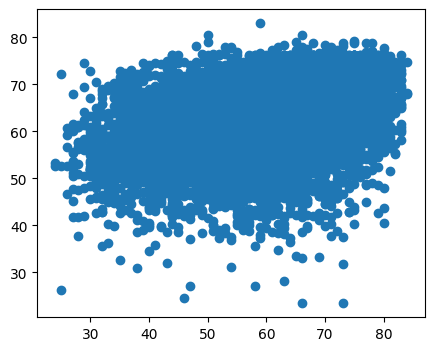

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
# plt.plot(testx, pred_lineal, linestyle='-', color = "red")
# plt.plot(tabla_regresion1["ESTU_INSE_INDIVIDUAL"], pred_lineal01, linestyle='-', color = "green")
plt.show()

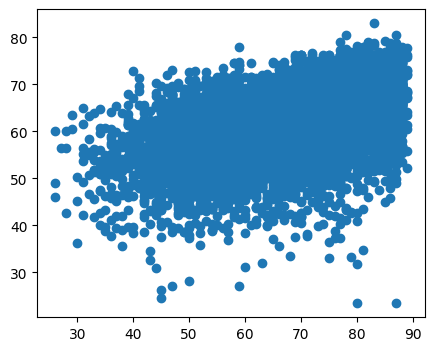

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
# plt.plot(testx, pred_lineal, linestyle='-', color = "red")
# plt.plot(tabla_regresion1["PUNT_LECTURA_CRITICA"], pred_lineal01, linestyle='-', color = "green")
plt.show()

In [ ]:
X = tabla_regresion1.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
Y = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0)
trainX.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
9652,66,69,64,60,60.0
3005,58,51,51,47,53.0
8227,74,79,80,68,76.0
9579,55,62,59,56,84.0


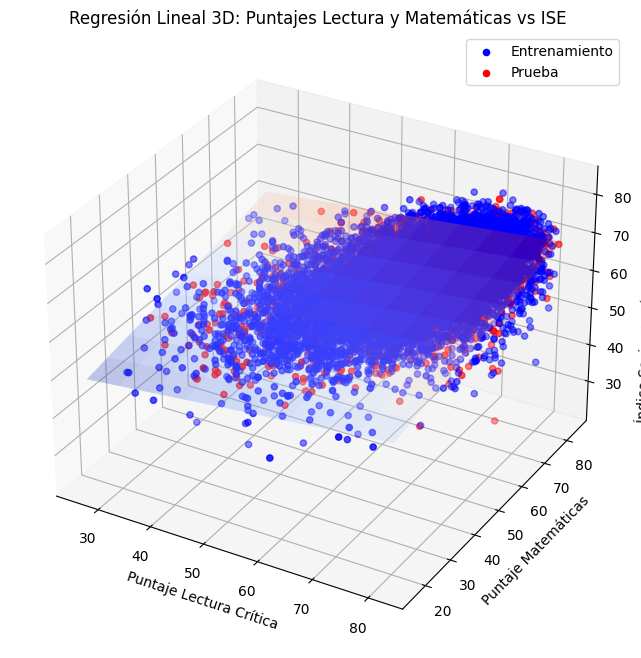

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Definir variables predictoras y objetivo
X = tabla_regresion1[["PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS"]]  # Dos variables predictoras para visualización 3D
Y = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo
modelo_lineal = LinearRegression()
modelo_lineal.fit(trainX, trainY)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo_lineal.predict(testX)

# Preparar el plano de regresión
xx, yy = np.meshgrid(np.linspace(trainX["PUNT_LECTURA_CRITICA"].min(), trainX["PUNT_LECTURA_CRITICA"].max(), num=10),
                     np.linspace(trainX["PUNT_MATEMATICAS"].min(), trainX["PUNT_MATEMATICAS"].max(), num=10))

# Calcular valores Z para el plano de regresión
plano_reg = modelo_lineal.coef_[0]*xx + modelo_lineal.coef_[1]*yy + modelo_lineal.intercept_

# Graficar la superficie de regresión y los puntos de datos
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

# Graficar el plano de regresión
ax.plot_surface(xx, yy, plano_reg, alpha=0.3, cmap='coolwarm')

# Graficar los puntos de entrenamiento en azul
ax.scatter(trainX["PUNT_LECTURA_CRITICA"], trainX["PUNT_MATEMATICAS"], trainY, color='blue', s=20, label="Entrenamiento")

# Graficar los puntos de prueba en rojo
ax.scatter(testX["PUNT_LECTURA_CRITICA"], testX["PUNT_MATEMATICAS"], testY, color='red', s=20, label="Prueba")

# Configurar los ejes y etiquetas
ax.set_xlabel('Puntaje Lectura Crítica')
ax.set_ylabel('Puntaje Matemáticas')
ax.set_zlabel('Índice Socioeconómico Individual (ISE)')
ax.set_title('Regresión Lineal 3D: Puntajes Lectura y Matemáticas vs ISE')

# Mostrar el gráfico
plt.legend()
plt.show()


En este grafico, en la region regresion lineal multiple podemos observar la comparatica con el puntaje de lectura y matematicas vs el nivel socioeconimerod


In [ ]:
red = MLPRegressor(hidden_layer_sizes=(100,100,100,100, 100, 100),
max_iter = 500,
activation = 'relu',
solver = 'adam',
learning_rate = 'invscaling')



In [ ]:
icfes_connan = datos_icfes[(datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &(~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
  (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
  (~datos_icfes['PUNT_C_NATURALES'].isna()) &
  (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
  (~datos_icfes['PUNT_INGLES'].isna())]



In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Filtrar los datos completos (sin valores faltantes en ESTU_INSE_INDIVIDUAL y otras variables explicativas)
datos_completos = datos_icfes.dropna(subset=['ESTU_INSE_INDIVIDUAL', 'PUNT_LECTURA_CRITICA',
                                             'PUNT_MATEMATICAS', 'PUNT_C_NATURALES',
                                             'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES'])

# Definir las variables explicativas (X) y la variable objetivo (Y)
X = datos_completos[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES',
                     'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y = datos_completos['ESTU_INSE_INDIVIDUAL']

# Dividir los datos en entrenamiento y prueba
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=0)

# Definir el modelo de red neuronal
red = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100),
                   max_iter=500,
                   activation='relu',
                   solver='adam',
                   learning_rate='invscaling',
                   random_state=0)

# Entrenar la red neuronal
red.fit(trainX, trainY)

# Predecir en el conjunto de prueba y evaluar el modelo
predicciones = red.predict(testX)
mse = mean_squared_error(testY, predicciones)
print(f"Error cuadrático medio (MSE): {mse}")

# Filtrar los datos donde ESTU_INSE_INDIVIDUAL tiene valores NaN pero las demás variables no
icfes_connan = datos_icfes[(datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
                           (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
                           (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
                           (~datos_icfes['PUNT_C_NATURALES'].isna()) &
                           (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
                           (~datos_icfes['PUNT_INGLES'].isna())]

# Definir las variables explicativas para los datos con NaN en ESTU_INSE_INDIVIDUAL
X_connan = icfes_connan[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES',
                         'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]

# Realizar la imputación (predecir ESTU_INSE_INDIVIDUAL)
imputaciones = red.predict(X_connan)

# Asignar las predicciones a los valores faltantes
datos_icfes.loc[datos_icfes['ESTU_INSE_INDIVIDUAL'].isna(), 'ESTU_INSE_INDIVIDUAL'] = imputaciones

# Mostrar los datos con las imputaciones realizadas
print(datos_icfes[datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()])  # Comprobar que no queden NaN


Error cuadrático medio (MSE): 41.359270701070734
Empty DataFrame
Columns: [ESTU_TIPODOCUMENTO, ESTU_NACIONALIDAD, ESTU_GENERO, ESTU_FECHANACIMIENTO, PERIODO, ESTU_CONSECUTIVO, ESTU_ESTUDIANTE, ESTU_PAIS_RESIDE, ESTU_DEPTO_RESIDE, ESTU_COD_RESIDE_DEPTO, ESTU_MCPIO_RESIDE, ESTU_COD_RESIDE_MCPIO, ESTU_PRESENTACIONSABADO, FAMI_ESTRATOVIVIENDA, FAMI_PERSONASHOGAR, FAMI_CUARTOSHOGAR, FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE, FAMI_TRABAJOLABORPADRE, FAMI_TRABAJOLABORMADRE, FAMI_TIENEINTERNET, FAMI_TIENESERVICIOTV, FAMI_TIENECOMPUTADOR, FAMI_TIENELAVADORA, FAMI_TIENEHORNOMICROOGAS, FAMI_TIENEAUTOMOVIL, FAMI_TIENEMOTOCICLETA, FAMI_TIENECONSOLAVIDEOJUEGOS, FAMI_NUMLIBROS, FAMI_COMELECHEDERIVADOS, FAMI_COMECARNEPESCADOHUEVO, FAMI_COMECEREALFRUTOSLEGUMBRE, FAMI_SITUACIONECONOMICA, ESTU_DEDICACIONLECTURADIARIA, ESTU_DEDICACIONINTERNET, ESTU_HORASSEMANATRABAJA, ESTU_TIPOREMUNERACION, COLE_CODIGO_ICFES, COLE_COD_DANE_ESTABLECIMIENTO, COLE_NOMBRE_ESTABLECIMIENTO, SEED_CODIGOMEN, SEED_NOMBRE, COLE_GENE

In [ ]:

# Imputación de datos usando la media
# Seleccionamos las columnas que deseamos imputar
datos_icfes_imputacion_media = datos_icfes  # Copia del dataframe original para no modificarlo directamente

# Aplicamos imputación usando la media
datos_icfes_imputacion_media['ESTU_INSE_INDIVIDUAL'] = datos_icfes_imputacion_media['ESTU_INSE_INDIVIDUAL'].fillna(
    value=datos_icfes_imputacion_media['ESTU_INSE_INDIVIDUAL'].mean()
)

# Mostramos un resumen de las imputaciones realizadas
print(datos_icfes_imputacion_media[['ESTU_INSE_INDIVIDUAL']].isna().sum())  # Debe dar 0 si ya no quedan NaN


ESTU_INSE_INDIVIDUAL    0
dtype: int64


In [ ]:
# Imputación de datos usando la mediana
datos_icfes_imputacion_mediana = datos_icfes # Copia del dataframe original para no modificarlo directamente

# Aplicamos imputación usando la mediana
datos_icfes_imputacion_mediana['ESTU_INSE_INDIVIDUAL'] = datos_icfes_imputacion_mediana['ESTU_INSE_INDIVIDUAL'].fillna(
    value=datos_icfes_imputacion_mediana['ESTU_INSE_INDIVIDUAL'].median()
)

# Mostramos un resumen de las imputaciones realizadas
print(datos_icfes_imputacion_mediana[['ESTU_INSE_INDIVIDUAL']].isna().sum())  # Debe dar 0 si ya no quedan NaN


ESTU_INSE_INDIVIDUAL    0
dtype: int64


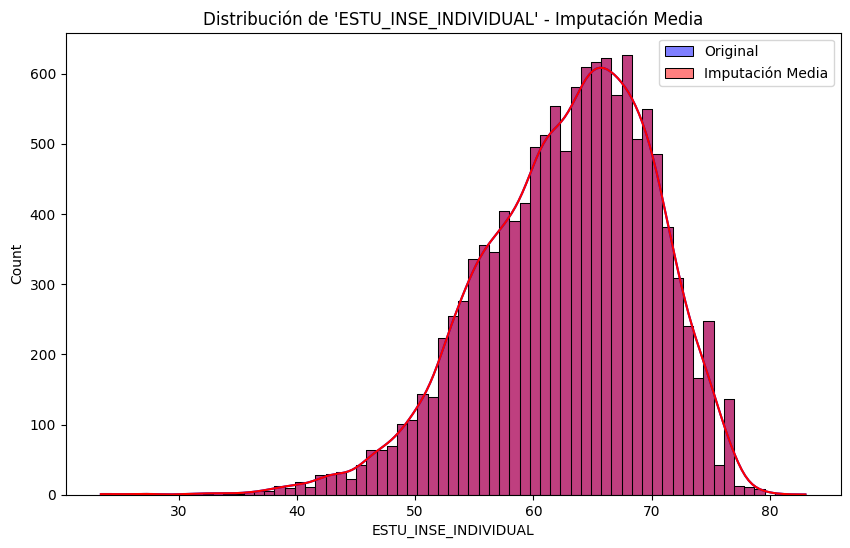

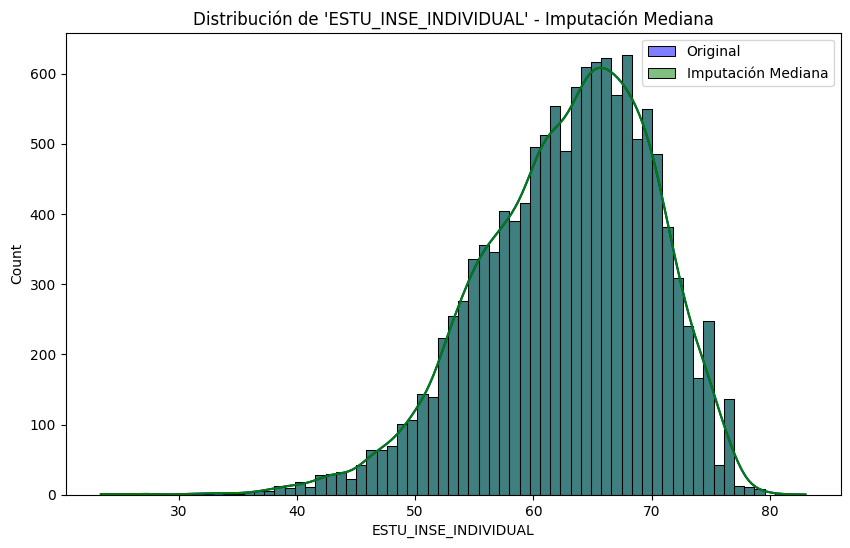

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar imputación con la media
plt.figure(figsize=(10,6))
sns.histplot(datos_icfes['ESTU_INSE_INDIVIDUAL'], color='blue', label='Original', kde=True)
sns.histplot(datos_icfes_imputacion_media['ESTU_INSE_INDIVIDUAL'], color='red', label='Imputación Media', kde=True)
plt.legend()
plt.title("Distribución de 'ESTU_INSE_INDIVIDUAL' - Imputación Media")
plt.show()

# Graficar imputación con la mediana
plt.figure(figsize=(10,6))
sns.histplot(datos_icfes['ESTU_INSE_INDIVIDUAL'], color='blue', label='Original', kde=True)
sns.histplot(datos_icfes_imputacion_mediana['ESTU_INSE_INDIVIDUAL'], color='green', label='Imputación Mediana', kde=True)
plt.legend()
plt.title("Distribución de 'ESTU_INSE_INDIVIDUAL' - Imputación Mediana")
plt.show()


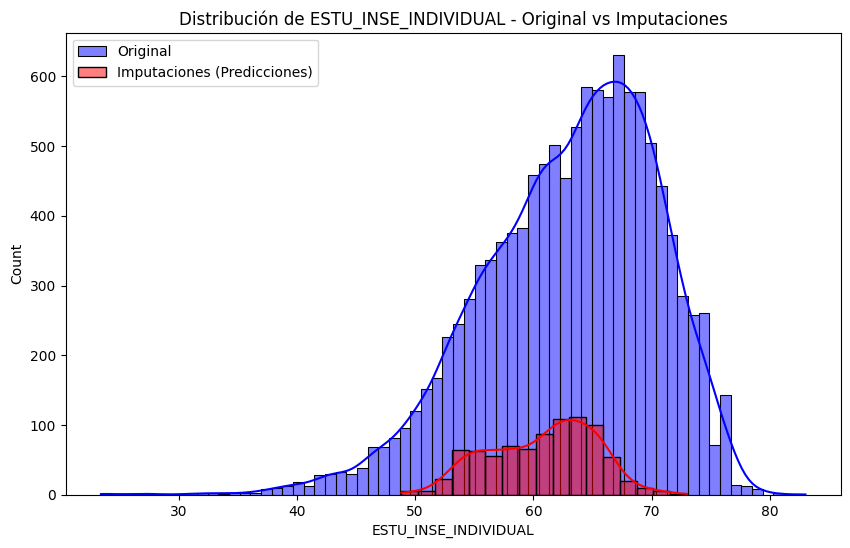

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución antes y después de la imputación
plt.figure(figsize=(10, 6))
sns.histplot(datos_completos['ESTU_INSE_INDIVIDUAL'], color='blue', label='Original', kde=True)
sns.histplot(imputaciones, color='red', label='Imputaciones (Predicciones)', kde=True)
plt.title("Distribución de ESTU_INSE_INDIVIDUAL - Original vs Imputaciones")
plt.legend()
plt.show()


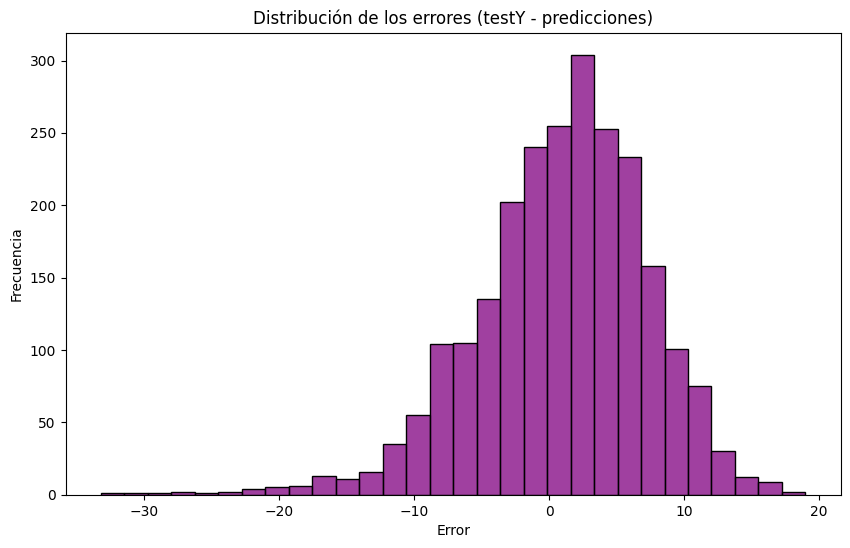

In [ ]:
# Calcular los errores de predicción
errores = testY - predicciones

# Graficar los errores
plt.figure(figsize=(10, 6))
sns.histplot(errores, bins=30, color='purple')
plt.title("Distribución de los errores (testY - predicciones)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()


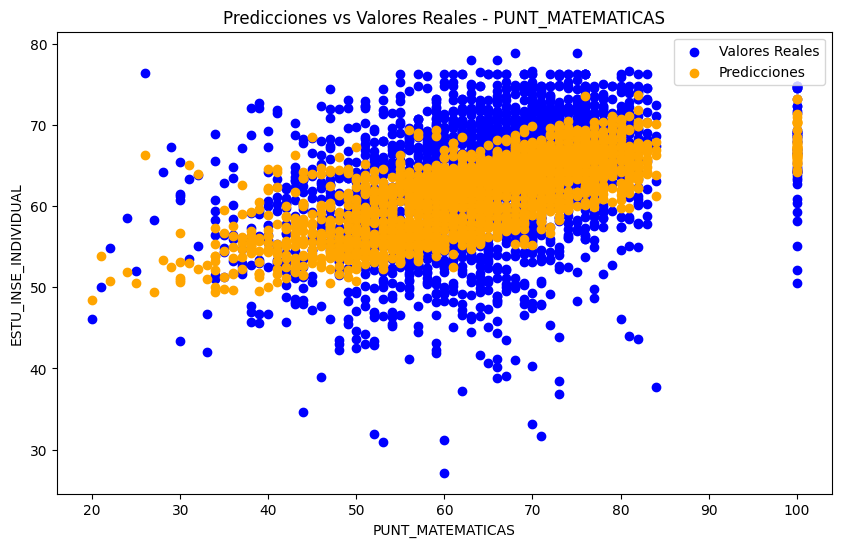

In [ ]:
# Graficar predicciones contra una variable explicativa, por ejemplo PUNT_MATEMATICAS
plt.figure(figsize=(10, 6))
plt.scatter(testX['PUNT_MATEMATICAS'], testY, color='blue', label='Valores Reales')
plt.scatter(testX['PUNT_MATEMATICAS'], predicciones, color='orange', label='Predicciones')
plt.title("Predicciones vs Valores Reales - PUNT_MATEMATICAS")
plt.xlabel("PUNT_MATEMATICAS")
plt.ylabel("ESTU_INSE_INDIVIDUAL")
plt.legend()
plt.show()


**Conclusion**
Podemos ver que en el grafico sobre el modelo de regresion linel multiple podemos observar que tanto el puntaje de matematicas como el puntaje de lectura critica vs el nivel socio economico de los estudiantes guardan o tienen una corres ciertos niveles de correspondencia